   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

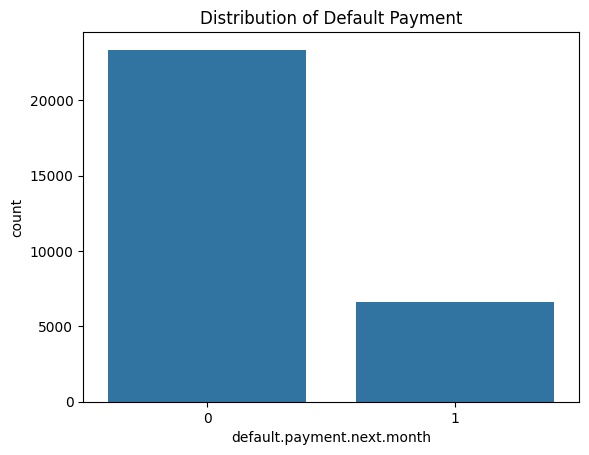

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "/content/UCI_Credit_Card.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Visualize the distribution of the target variable
sns.countplot(x='default.payment.next.month', data=df)
plt.title('Distribution of Default Payment')
plt.show()




In [5]:
print(df.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')


In [7]:
# Encode categorical variables
df['SEX'] = df['SEX'].map({1: 'Male', 2: 'Female'})
df['MARRIAGE'] = df['MARRIAGE'].map({1: 'Married', 2: 'Single', 3: 'Others'})
df['EDUCATION'] = df['EDUCATION'].map({1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others', 5: 'Unknown', 6: 'Unknown'})

df = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE'])

# Standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
            'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

df[num_cols] = scaler.fit_transform(df[num_cols])

# Display the first few rows of the preprocessed dataframe
print(df.head())


   ID  LIMIT_BAL       AGE     PAY_0     PAY_2     PAY_3     PAY_4     PAY_5  \
0   1  -1.136720 -1.246020  1.794564  1.782348 -0.696663 -0.666599 -1.530046   
1   2  -0.365981 -1.029047 -0.874991  1.782348  0.138865  0.188746  0.234917   
2   3  -0.597202 -0.161156  0.014861  0.111736  0.138865  0.188746  0.234917   
3   4  -0.905498  0.164303  0.014861  0.111736  0.138865  0.188746  0.234917   
4   5  -0.905498  2.334029 -0.874991  0.111736 -0.696663  0.188746  0.234917   

      PAY_6  BILL_AMT1  ...  SEX_Female  SEX_Male  EDUCATION_Graduate School  \
0 -1.486041  -0.642501  ...        True     False                      False   
1  1.992316  -0.659219  ...        True     False                      False   
2  0.253137  -0.298560  ...        True     False                      False   
3  0.253137  -0.057491  ...        True     False                      False   
4  0.253137  -0.578618  ...       False      True                      False   

   EDUCATION_High School  EDUCATION_Ot

In [10]:
# Split the data into features and target variable
X = df.drop(columns=['default.payment.next.month'])
y = df['default.payment.next.month']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8123333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.71      0.24      0.36      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.61      0.63      6000
weighted avg       0.80      0.81      0.77      6000



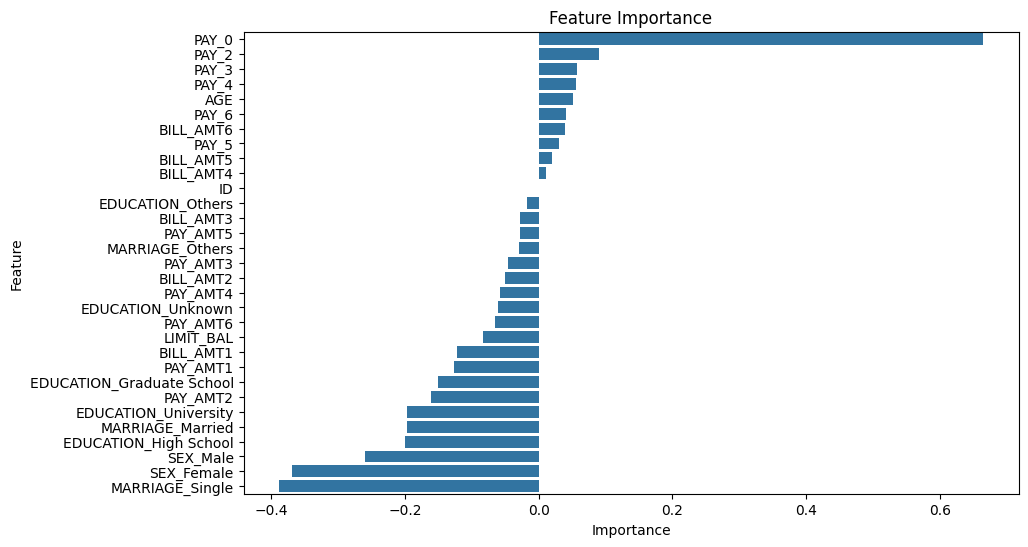

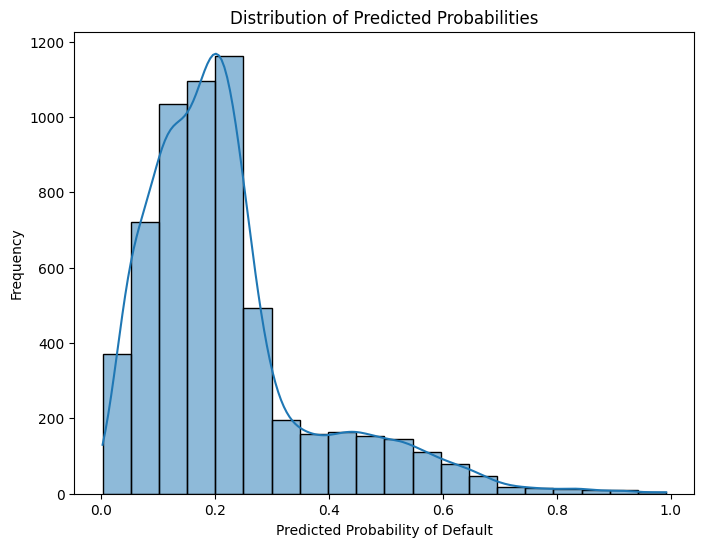

In [11]:
# Visualize feature importance
importance = lr_model.coef_[0]
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

# Visualize the distribution of predicted probabilities
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8, 6))
sns.histplot(y_pred_proba, bins=20, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Default')
plt.ylabel('Frequency')
plt.show()
